In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
from random import sample
import matplotlib.pyplot as plt


In [4]:
# Data of 15 people for training & testing the model, splitting the train-test set 
df_features = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile_10.csv")
df_features_3people = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile.csv")

frames = [df_features, df_features_3people]
df_15 = pd.concat(frames)

#Drop duplicates
df_unique = df_15.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.describe()
print("Shape of training and testing data", df_unique.shape)

X_data = df_unique.values[:, 2:45]
y_data = df_unique.values[:, 45]
usersList = set(df_unique.values[:,0])
print(len(usersList)+2) # Userid is for 3 people hence  

Shape of training and testing data (821, 46)
15


In [6]:
# Splitting the training and testing set by 33%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33, random_state = 42)
# Fitting the logistic regression model
clf = LogisticRegression(C=0.01, random_state=1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
predict = clf.predict(X_test)
logisticRegScore = clf.score(X_test, y_test)

plt.figure(1, figsize=(4, 3))
plt.clf()
print("Logistic regression Score")
print(logisticRegScore*100)
print("Coefficients of the features")
print(clf.coef_)
print(X_train.shape)

# Convert all the values to float 
float_array=np.array(X_train,dtype=np.float32)
feature_importance = np.std(float_array, 0)*np.absolute(clf.coef_)

np_column_list = np.array(df_unique.columns.tolist())
column_names = np_column_list[2:45,]

# featureimp_list = feature_importance.split(" ")
# print("List= ", featureimp_list)
print("Column Names=", column_names)
print("Feature importance=", feature_importance)
print(np.sort(feature_importance))

# TimeDiff-X
# StdDev-x
# TimeDiffPeaks-y

Logistic regression Score
95.2029520295
Coefficients of the features
[[ -2.27658727e-03  -4.33109059e-03  -8.19361746e-03  -1.12167114e-03
    8.39744110e-03   1.59354401e-02   7.70941170e-03  -6.50587633e-03
   -9.84746560e-03  -4.17763020e-03  -3.97150608e-03  -7.38401821e-03
   -9.37709399e-03  -6.46962045e-03   1.55653758e-04  -2.87614307e-03
    3.75548377e-03   6.85732060e-03   7.38420808e-03   4.26326533e-03
   -3.47273162e-03  -3.52646235e-03  -8.43356319e-05   1.52866626e-03
    3.17276648e-04  -5.96757471e-04   6.35076775e-05   1.31835280e-03
   -5.78737659e-04  -7.59632202e-04  -6.43644303e-02   5.89593726e-02
    7.33384679e-02  -3.54361750e-01  -2.49804221e-01  -3.33732817e-01
    4.96195335e-02   1.26346378e-01  -9.51147655e-02  -4.10671927e-01
   -2.96865368e-01  -3.98479809e-01   1.17495901e-02]]
(550, 43)
Column Names= ['Bin1,x' 'Bin2,x' 'Bin3,x' 'Bin4,x' 'Bin5,x' 'Bin6,x' 'Bin7,x' 'Bin8,x'
 'Bin9,x' 'Bin10,x' 'Bin1,y' 'Bin2,y' 'Bin3,y' 'Bin4,y' 'Bin5,y' 'Bin6,y'
 'Bin

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict, labels=["walking", "running"])
print(cm)

[[143   6]
 [  7 115]]


0.951177247222


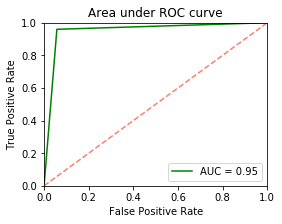

In [15]:
#Area under ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# # Encode the labels for ROC plot
def encode_label(y_test):
    y_test_binary = []
    for y in y_test:
        if y == "walking":
            y_test_binary.append(1)
        else:
            y_test_binary.append(0)
    return y_test_binary

y_test_binary = encode_label(y_test)
y_predict_binary = encode_label(predict)

# Compute fpr, tpr, thresholds and roc auc
# fpr, tpr, thresholds = roc_curve(y_test_binary, probas_[:, 1])
fpr, tpr, thresholds = roc_curve(y_test_binary, y_predict_binary)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc, color="green")
plt.plot([0, 1], [0, 1], 'k--', color="salmon")  # random predictions curve, 50% accuracy
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under ROC curve')
plt.legend(loc="lower right")
# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/roc_lr', dpi=200)
plt.show()
